X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeReg

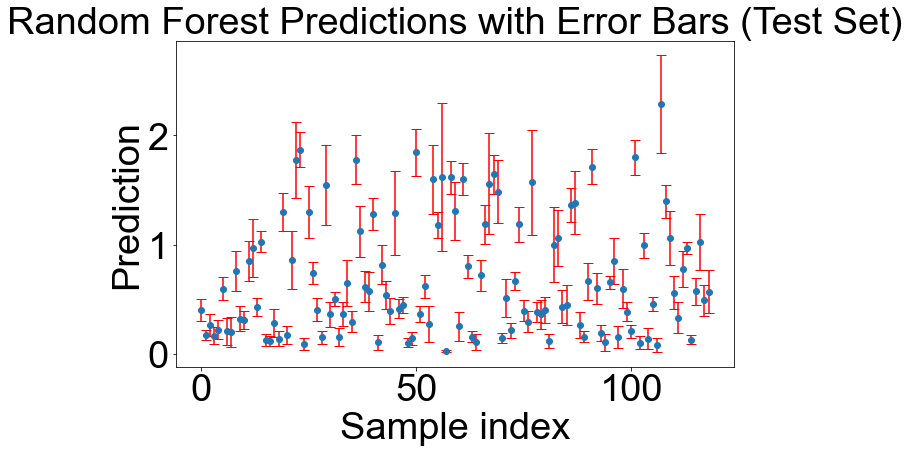

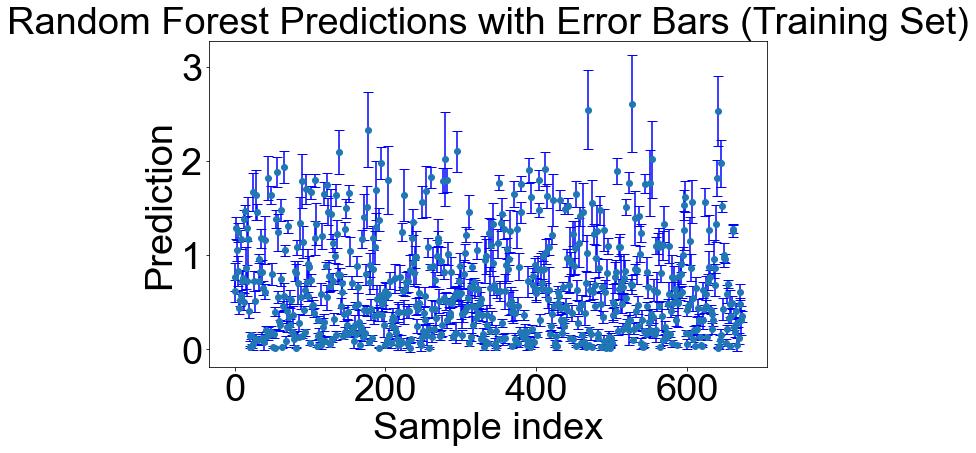

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load and preprocess data
df = pd.read_csv("feature_target.dat", sep=" ", )
df = df.dropna(axis=1)
df_clean = df.drop(columns=['Unnamed: 0', 'formula'])  # Drop non-numeric columns

# Define features and target
X = df_clean.drop(columns=["diff_coeff_mul_thousand"])
y = df_clean["diff_coeff_mul_thousand"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=62)

# Train the RandomForestRegressor
rf = RandomForestRegressor( n_estimators=100, random_state=62) #
rf.fit(X_train, y_train)

# Get predictions from each tree for the training set
all_tree_predictions_train = np.array([tree.predict(X_train) for tree in rf.estimators_])

# Mean prediction for the training set
mean_predictions_train = np.mean(all_tree_predictions_train, axis=0)

# Standard deviation (error bars) for the training set
std_dev_predictions_train = np.std(all_tree_predictions_train, axis=0)

# Get predictions from each tree for the test set
all_tree_predictions_test = np.array([tree.predict(X_test) for tree in rf.estimators_])

# Mean prediction for the test set
mean_predictions_test = np.mean(all_tree_predictions_test, axis=0)

# Standard deviation (error bars) for the test set
std_dev_predictions_test = np.std(all_tree_predictions_test, axis=0)

# Get the indices of the training and test set samples
train_indices = X_train.index
test_indices = X_test.index

# Create new dataframes to store the results
results_df_train = df.loc[train_indices].copy()
results_df_train['mean_prediction'] = mean_predictions_train
results_df_train['std_dev_prediction'] = std_dev_predictions_train

results_df_test = df.loc[test_indices].copy()
results_df_test['mean_prediction'] = mean_predictions_test
results_df_test['std_dev_prediction'] = std_dev_predictions_test

# Sort the dataframes by the standard deviation to identify formulas with higher error bars
results_df_train_sorted = results_df_train.sort_values(by='std_dev_prediction', ascending=False)
results_df_test_sorted = results_df_test.sort_values(by='std_dev_prediction', ascending=False)

# Display the top results with highest error bars for both training and test sets
top_results_train = results_df_train_sorted.head()
top_results_test = results_df_test_sorted.head()

# import ace_tools as tools; 
# tools.display_dataframe_to_user(name="Top Formulas with Highest Error Bars in Training Set", dataframe=top_results_train)
# tools.display_dataframe_to_user(name="Top Formulas with Highest Error Bars in Test Set", dataframe=top_results_test)

# Plot the results with error bars for the test set for visualization
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_predictions_test)), mean_predictions_test, yerr=std_dev_predictions_test, fmt='o', ecolor='r', capsize=5)
plt.xlabel('Sample index')
plt.ylabel('Prediction')
plt.title('Random Forest Predictions with Error Bars (Test Set)')
plt.show()

# Plot the results with error bars for the training set for visualization
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_predictions_train)), mean_predictions_train, yerr=std_dev_predictions_train, fmt='o', ecolor='b', capsize=5)
plt.xlabel('Sample index')
plt.ylabel('Prediction')
plt.title('Random Forest Predictions with Error Bars (Training Set)')
plt.show()


In [110]:
results_df_train_sorted

,Unnamed: 0,formula,diff_coeff_mul_thousand,temperature,AAV,LBI,SDLI,SBI,ENS,RBI,...,atomic_radius_avg,atomic_radius_avg_exclude_Li,ratio_r_without_Li_with,avg_m_with_Li,avg_m_wiout_Li,avg_X_with_Li,avg_X_wiout_Li,avg_diff_of_X_Li_rest,mean_prediction,std_dev_prediction
763,763,RbLi2,2.927603,2500,46.021753,0.034585,0.065879,0.122791,0.820000,0.281659,...,1.750000,2.350000,1.342857,33.116600,85.467800,0.926667,0.820000,-0.106667,2.608592,0.515051
29,29,Li(SiSe2)3,2.369778,2500,29.972943,1.307805,0.458924,0.434211,2.333333,3.011909,...,1.165000,1.133333,0.972818,56.495750,62.001833,2.198000,2.333333,0.135333,2.022241,0.496773
771,771,RbLiS,0.979005,2500,33.855645,0.695625,0.751862,1.161188,1.700000,0.599063,...,1.600000,1.675000,1.046875,41.491267,58.766400,1.460000,1.700000,0.240000,1.169430,0.447979
366,366,Li4(SiI3)3,2.800682,2500,48.020516,1.335540,0.606002,0.706190,2.470000,1.891189,...,1.356250,1.325000,0.976959,78.385046,102.199727,2.097500,2.470000,0.372500,2.546079,0.419539
468,468,Li5(SiBr4)3,2.050257,2500,38.988664,1.478171,0.812386,0.874682,2.748000,1.689951,...,1.217500,1.140000,0.936345,53.890475,69.540300,2.306000,2.748000,0.442000,2.022646,0.409570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,Li6Zr2O7,0.019915,1000,10.644234,1.169717,1.180885,1.162340,2.971111,1.006346,...,1.066667,0.811111,0.760417,22.405987,32.715978,2.174667,2.971111,0.796444,0.023410,0.006689
199,199,Li2FeNi3O8,0.012271,1000,9.396516,1.625309,0.951038,0.858367,2.923333,1.893490,...,0.939286,0.854167,0.909379,26.700171,29.993367,2.645714,2.923333,0.277619,0.015716,0.006629
717,717,LiVO3,0.027440,1000,11.459293,1.519729,1.070705,0.939837,2.987500,1.617013,...,0.920000,0.787500,0.855978,21.176140,24.734925,2.586000,2.987500,0.401500,0.026742,0.006168
195,195,Li2CuSiO4,0.016830,1000,10.600897,1.452209,1.035522,1.009840,2.926667,1.438058,...,0.968750,0.808333,0.834409,21.188887,25.938183,2.440000,2.926667,0.486667,0.019681,0.005381


In [78]:
type(results_df_train_sorted.loc[763])

pandas.core.series.Series

In [111]:
import plotly.graph_objects as go

# Create a parity plot using Plotly
fig_parity = go.Figure()

fig_parity.add_trace(go.Scatter(
    x=results_df_train_sorted['diff_coeff_mul_thousand'],
    y=results_df_train_sorted['mean_prediction'],
    error_y=dict(type='data', array=results_df_train_sorted['std_dev_prediction'], visible=True),
    mode='markers',
    marker=dict(color='blue'),
    text=results_df_train_sorted['formula'],  # Add formula names for hover information
    hoverinfo='text+x+y'
))

# Add a line y=x for reference
fig_parity.add_trace(go.Scatter(
    x=[min(results_df_train_sorted['diff_coeff_mul_thousand']), max(results_df_train_sorted['diff_coeff_mul_thousand'])],
    y=[min(results_df_train_sorted['diff_coeff_mul_thousand']), max(results_df_train_sorted['diff_coeff_mul_thousand'])],
    mode='lines',
    line=dict(color='red', dash='dash'),
    showlegend=False
))

fig_parity.update_layout(
    font=dict(family="Arial", size=36, color="black"),
    title=dict(text='RF Training Set', x=0.5, y=0.9),
    xaxis_title='DFT D<sub>Li</sub> (x10<sup>-3</sup> cm<sup>2</sup>/s)',
    yaxis_title='RF D<sub>Li</sub> (x10<sup>-3</sup> cm<sup>2</sup>/s)',
    showlegend=False,
    width=640,  # Set figure width
    height=600 ,  # Set figure height
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper (figure) background to transparent
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent    
    xaxis=dict(gridcolor='gray'),  # Set x-axis grid lines to gray
    yaxis=dict(gridcolor='gray')   # Set y-axis grid lines to gray    
)

fig_parity.write_html("parity_plot_random_forest.html")
fig_parity.write_image("parity_plot_random_forest.pdf")
fig_parity.show()


In [120]:

import plotly.graph_objects as go

# Create a parity plot using Plotly
fig_parity = go.Figure()

fig_parity.add_trace(go.Scatter(
    x=results_df_test_sorted['diff_coeff_mul_thousand'],
    y=results_df_test_sorted['mean_prediction'],
    error_y=dict(type='data', array=results_df_test_sorted['std_dev_prediction'], visible=True),
    mode='markers',
    marker=dict(color='blue'),
    text=results_df_test_sorted['formula'],  # Add formula names for hover information
    hoverinfo='text+x+y'
))

# Add a line y=x for reference
fig_parity.add_trace(go.Scatter(
    x=[min(results_df_test_sorted['diff_coeff_mul_thousand']), max(results_df_test_sorted['diff_coeff_mul_thousand'])],
    y=[min(results_df_test_sorted['diff_coeff_mul_thousand']), max(results_df_test_sorted['diff_coeff_mul_thousand'])],
    mode='lines',
    line=dict(color='red', dash='dash'),
    showlegend=False
))

fig_parity.update_layout(
    font=dict(family="Arial", size=36, color="black"),
    title=dict(text='RF Test Set', x=0.5, y=0.9),
    xaxis_title='DFT D<sub>Li</sub> (x10<sup>-3</sup> cm<sup>2</sup>/s)',
    yaxis_title='RF D<sub>Li</sub> (x10<sup>-3</sup> cm<sup>2</sup>/s)',
    showlegend=False,
    width=640,  # Set figure width
    height=600 ,  # Set figure height
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper (figure) background to transparent
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent    
    xaxis=dict(gridcolor='gray'),  # Set x-axis grid lines to gray
    yaxis=dict(gridcolor='gray')   # Set y-axis grid lines to gray    
)

fig_parity.write_html("parity_plot_random_forest_test.html")
fig_parity.write_image("parity_plot_random_forest_test.pdf")
fig_parity.show()

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Train the model
model = RandomForestRegressor( n_estimators=100, random_state=62)
model.fit(X_train, y_train)

# Step 2: Predict on the training data
mean_prediction_train = model.predict(X_train)

# Step 3: Calculate MAE, R2, and RMSE for the training data
mae_train = mean_absolute_error(y_train, mean_prediction_train)
r2_train = r2_score(y_train, mean_prediction_train)
rmse_train = np.sqrt(mean_squared_error(y_train, mean_prediction_train))

print("Training Data - MAE:", mae_train)
print("Training Data - R2:", r2_train)
print("Training Data - RMSE:", rmse_train)

# Step 4: Predict on the test data
mean_prediction_test = model.predict(X_test)

# Step 5: Calculate MAE, R2, and RMSE for the test data
mae_test = mean_absolute_error(y_test, mean_prediction_test)
r2_test = r2_score(y_test, mean_prediction_test)
rmse_test = np.sqrt(mean_squared_error(y_test, mean_prediction_test))

print("Test Data - MAE:", mae_test)
print("Test Data - R2:", r2_test)
print("Test Data - RMSE:", rmse_test)

Training Data - MAE: 0.03356987171471024
Training Data - R2: 0.9908653212901645
Training Data - RMSE: 0.051211516855205856
Test Data - MAE: 0.08420381813445384
Test Data - R2: 0.9545490804524269
Test Data - RMSE: 0.11968424455151909


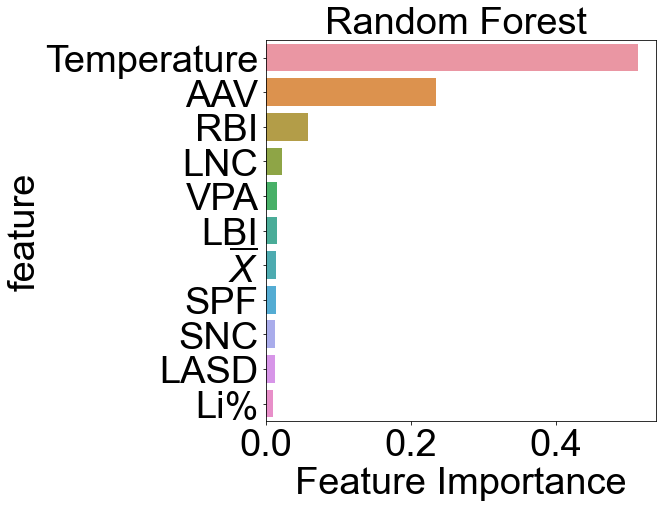

In [118]:

from matplotlib import colors as mcolors
import seaborn as sns
import pandas
import matplotlib
font_size = 38
matplotlib.rcParams['font.size'] = font_size
matplotlib.rcParams['axes.titlesize'] = font_size
matplotlib.rcParams['xtick.labelsize'] = font_size  # Set x-tick label size
matplotlib.rcParams['ytick.labelsize'] = font_size  # Set x-tick label size
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"


feature_importances_rf = pandas.DataFrame({"feature": X_train.columns, "importance": rf.feature_importances_}).sort_values(by="importance", ascending=False)
# plt.figure(figsize=(7,7),dpi=300)
fig, ax = plt.subplots(figsize=(7,7))

# ax = sns.barplot(feature_importances_rf[0:11], x="importance", y="feature", ax=ax,)
ax = sns.barplot(data=feature_importances_rf[0:11], x="importance", y="feature", ax=ax)
plot_colors = [rect.get_facecolor() for rect in ax.patches]
plot_colors_hex = [mcolors.to_hex(rgba) for rgba in plot_colors]

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'Temperature'
labels[6] = r'$\overline{X}$'
labels[10] = 'Li%'
# labels[12] = r'E$_{coh}^{Li}$'
# labels[14] = r'E$_{coh}$'

ax.set_yticklabels(labels)

# plt.yticks(ax.get_yticks(), labels, )

# fig = ax.get_figure()
plt.title("Random Forest ")
plt.xlabel("Feature Importance")
fig.savefig('RF_feature_importance.pdf',  bbox_inches='tight')
# plt.show()


In [115]:
# feature_importances_rf

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


# Load and preprocess data
# df = pd.read_csv("/path/to/your/data.csv")
# df_clean = df.drop(columns=['Unnamed: 0', 'formula'])  # Adjust columns as needed

# # Define features and target
# X = df_clean.drop(columns=["diff_coeff_mul_thousand"])
# y = df_clean["diff_coeff_mul_thousand"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=62)

# Initialize variables to store errors
train_errors = []
test_errors = []
n_estimators = range(1, 201)

# Evaluate the model with different numbers of trees
for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=62)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    # train_errors.append(mean_squared_error(y_train, y_train_pred))
    train_errors.append(sqrt(mean_squared_error(y_train, y_train_pred)))
    test_errors.append(sqrt(mean_squared_error(y_test, y_test_pred)))



In [88]:
import plotly.graph_objs as go
import plotly.io as pio
# Convert n_estimators to a list or numpy array
n_estimators_list = list(n_estimators)  # Convert to list


# Create traces
trace1 = go.Scatter(
    x=n_estimators_list, 
    y=train_errors, 
    mode='lines', 
    name='Train'
)
trace2 = go.Scatter(
    x=n_estimators_list, 
    y=test_errors, 
    mode='lines', 
    name='Test'
)

# Create layout
layout = go.Layout(
    title='Random Forest Training and Testing Error',
    xaxis=dict(title='Number of Trees'),
    yaxis=dict(title='RMSE')
)

# Create figure and add traces
fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.add_shape(type="line",
              x0=0, y0=0, x1=1, y1=0,
              line=dict(color="black", width=2),
              xref="paper", yref="y")

fig.update_layout(
    font=dict(family="Arial", size=36, color="black"),
    title=dict(text='RF Loss Curves', x=0.5, y=0.9),
    xaxis_title='Number of Trees',
    yaxis_title='RMSE',
    showlegend=True,
    width=800,  # Set figure width
    height=600 ,  # Set figure height
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper (figure) background to transparent
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent    
    xaxis=dict(gridcolor='gray'),  # Set x-axis grid lines to gray
    yaxis=dict(gridcolor='gray')   # Set y-axis grid lines to gray    
)

# Save and show figure
pio.write_html(fig, "RF_rmse_vs_num_trees.html")
pio.write_image(fig, "RF_rmse_vs_num_trees.pdf")
fig.show()


In [116]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=62)
# Define custom RMSE scoring function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = make_scorer(rmse, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(rf, X_train, y_train, cv=kf, scoring=scoring)
cv_mean = np.mean(cv_results)
cv_std = np.std(cv_results)

print(f"Cross-Validation RMSE: {cv_mean:.3f} ± {cv_std:.3f}")


Cross-Validation RMSE: -0.141 ± 0.009


In [107]:
import shap


import numpy as np
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("feature_target.dat", sep=" ", )
df_clean = df.drop(columns=['Unnamed: 0', 'formula'])  # Adjust columns as needed

# Define features and target
X = df_clean.drop(columns=["diff_coeff_mul_thousand"])
y = df_clean["diff_coeff_mul_thousand"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=62)

# Rename features in the X_test DataFrame
feature_renames = {
    'Li_percentage': 'Li%',
    'temperature': 'Temperature',   
    'avg_X_with_Li': r'$\overline{X}$',
    # 'avg_Echo_wiout_Li': r"$\overline{E_{coh}^{Li}}$ ",
    # 'avg_Echo_with_Li':r'$\overline{E_{coh}}$',
    # 'BR5_M_with_Li': '$\sqrt{\frac{E_{coh}\cdot\Bar{R}^2}{\Bar{m}}}$',
    # 'SLPW_PP':r'SLPW\_pp',
    # Add more renames as needed
    # 'original_feature_name': 'new_feature_name',
}

X_test_renamed = X_test.rename(columns=feature_renames)

# Define the model
# model = xgb.XGBRegressor(n_estimators=100, max_depth=4, n_jobs=6, reg_alpha=0.8,
#                          learning_rate=0.1, random_state=62)
rf = RandomForestRegressor( n_estimators=100, random_state=62) #
rf.fit(X_train, y_train)
# Train the model
rf.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(rf)
shap_values = explainer(X_test_renamed)

shap_importance = np.abs(shap_values.values).mean(axis=0)
top_11_indices = np.argsort(shap_importance)[-11:]

# Subset the SHAP values and feature data to the top 11 features
shap_values_top_11 = shap_values[:, top_11_indices]
X_test_renamed_top_11 = X_test_renamed.iloc[:, top_11_indices]

# Generate and save SHAP summary plot for the top 11 features
shap.summary_plot(shap_values_top_11, X_test_renamed_top_11, show=False)
plt.savefig("RF_shap_summary_plot_top_11.pdf", bbox_inches='tight', dpi=300)
plt.close()  # Close the plot to free memory

# fig, ax = plt.subplots(figsize=(7,7))

# # Generate SHAP summary plot with renamed features
# plt = shap.summary_plot(shap_values, X_test_renamed, show=False)
# fig.savefig("XGBoost_shap_summary_plot.pdf", bbox_inches='tight')



